In [1]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.6.0
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
cloudpathlib              0.16.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.4
contourpy                 1.2.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm            3.7.1
executing       

# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Aanandya Mittal

### [Link to Repository](https://github.com/AanandyaMittal/web-scraping)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

### Question 1

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [43]:
response = requests.get("https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/")

#retrieve html
parsed = BeautifulSoup(response.content, "html5lib")
text = parsed.get_text(strip=True)

article_text = parsed.find("article").decode_contents()

# Save as .pkl
with open("C:\\Users\\AanandyaMittal\\Documents\\web-scraping\\article.pkl", "wb") as file:
   pickle.dump(article_text, file)

print("Article saved as .pkl")

Article saved as .pkl


### Question 2

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [61]:
# Read
with open(r'C:\Users\AanandyaMittal\Documents\web-scraping\article.pkl', 'rb') as file:
    html = pickle.load(file)

# HTML to text
soup = BeautifulSoup(html, 'html5lib')
text = soup.get_text()
print(text)


        How Laser Headlights Work
        
            
                130 Comments            
            
                by:
                Lewin Day
            
        

        
            March 22, 2021
            
                
                
            
        

        
    

    
        When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image 

### Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [75]:
# Load
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

# Token Frequency
tokens = [
    token.text.lower() 
    for token in doc
    if not token.is_punct 
    and not token.is_stop 
    and not token.is_space 
]
freq_t = Counter(tokens)
common_tokens = freq_t.most_common(5)

# Print
print("5 Most Common Tokens:"),
for token, freq in common_tokens:
    print(f"{token}", end=" ")

print()
print("\nTokens/Frequencies:")
for token, freq in freq_t.items():
    print(f"Token: {token}   Frequency: {freq}")

5 Most Common Tokens:
laser headlights headlight technology led 

Tokens/Frequencies:
Token: laser   Frequency: 35
Token: headlights   Frequency: 19
Token: work   Frequency: 2
Token: 130   Frequency: 1
Token: comments   Frequency: 1
Token: lewin   Frequency: 1
Token: day   Frequency: 3
Token: march   Frequency: 2
Token: 22   Frequency: 1
Token: 2021   Frequency: 1
Token: think   Frequency: 1
Token: onward   Frequency: 1
Token: automotive   Frequency: 6
Token: technology   Frequency: 10
Token: usually   Frequency: 1
Token: thing   Frequency: 2
Token: come   Frequency: 5
Token: mind   Frequency: 3
Token: engines   Frequency: 1
Token: fuel   Frequency: 1
Token: efficiency   Frequency: 3
Token: switch   Frequency: 2
Token: electric   Frequency: 1
Token: power   Frequency: 3
Token: mean   Frequency: 1
Token: thousands   Frequency: 1
Token: engineers   Frequency: 2
Token: world   Frequency: 2
Token: working   Frequency: 1
Token: improve   Frequency: 1
Token: state   Frequency: 2
Token: art  

### Question 4

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [73]:
# Lemma Frequency 
lemmas = [
        token.lemma_.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
]
freq_l = Counter(lemmas)
common_lemmas = freq_l.most_common(5)

# Print
print("5 Most Common Lemmas:"),
for lemma, freq in common_lemmas:
    print(f"{lemma}", end=" "),

print()
print("\nLemmas/Frequencies:")
for lemma, freq in freq_l.items():
    print(f"Lemma: {lemma}   Frequency: {freq}")

5 Most Common Lemmas:
laser headlight beam technology light 

Lemmas/Frequencies:
Lemma: laser   Frequency: 40
Lemma: headlights   Frequency: 2
Lemma: work   Frequency: 3
Lemma: 130   Frequency: 1
Lemma: comments   Frequency: 1
Lemma: lewin   Frequency: 1
Lemma: day   Frequency: 4
Lemma: march   Frequency: 2
Lemma: 22   Frequency: 1
Lemma: 2021   Frequency: 1
Lemma: think   Frequency: 1
Lemma: onward   Frequency: 1
Lemma: automotive   Frequency: 6
Lemma: technology   Frequency: 10
Lemma: headlight   Frequency: 28
Lemma: usually   Frequency: 1
Lemma: thing   Frequency: 3
Lemma: come   Frequency: 7
Lemma: mind   Frequency: 3
Lemma: engine   Frequency: 1
Lemma: fuel   Frequency: 1
Lemma: efficiency   Frequency: 3
Lemma: switch   Frequency: 2
Lemma: electric   Frequency: 1
Lemma: power   Frequency: 3
Lemma: mean   Frequency: 2
Lemma: thousand   Frequency: 1
Lemma: engineer   Frequency: 2
Lemma: world   Frequency: 2
Lemma: improve   Frequency: 1
Lemma: state   Frequency: 2
Lemma: art   Freq

### Question 5

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [71]:
# Define
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [
        token.text.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
    ]
    if tokens:
        return sum(token in interesting_tokens for token in tokens) / len(tokens)
    else:
        return 0

def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [
        token.lemma_.lower() 
        for token in doc
        if not token.is_punct 
        and not token.is_stop 
        and not token.is_space 
    ]
    if lemmas:
        return sum(lemma in interesting_lemmas for lemma in lemmas) / len(lemmas) 
    else:
        return 0

# Extract
sentence = next(doc.sents).text
freq_tokens = ['laser', 'headlights', 'headlight', 'technology', 'led']
freq_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']

# Print
print(f"Sentence Token Score: {score_sentence_by_token(sentence, freq_tokens)}")
print(f"Sentence Lemma Score: {score_sentence_by_lemma(sentence, freq_lemmas)}")

Sentence Token Score: 0.2
Sentence Lemma Score: 0.1


### Question 6

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

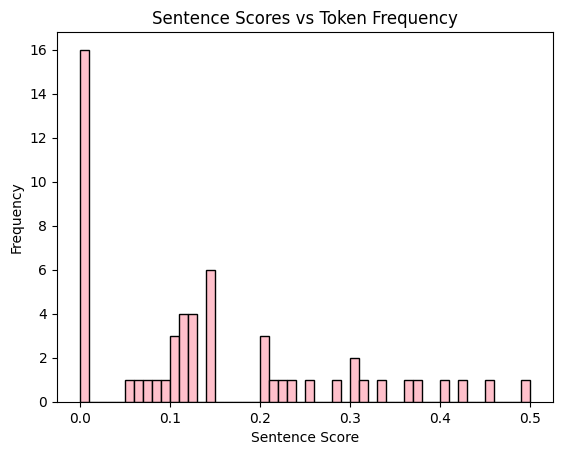

In [54]:
# Score all sentences
scores_by_token = [score_sentence_by_token(sentence.text, freq_tokens) for sentence in doc.sents]

# Plot
plt.figure()
plt.hist(scores_by_token, bins=50, color='pink', edgecolor='black')
plt.title('Sentence Scores vs Token Frequency')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# From my histogram, the most common range of token scores is 0.0-0.01

### Question 7

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

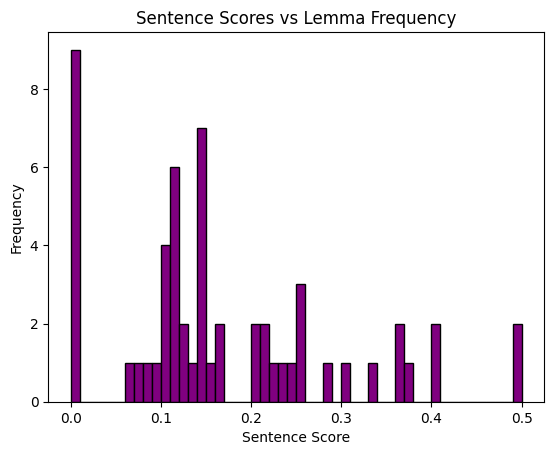

In [55]:
# Score each sentence using lemmas
scores_by_lemma = [score_sentence_by_lemma(sentence.text, freq_lemmas) for sentence in doc.sents]

# Plot
plt.hist(scores_by_lemma, bins=50, color='purple', edgecolor='black')
plt.title('Sentence Scores vs Lemma Frequency')
plt.xlabel('Sentence Score')
plt.ylabel('Frequency')
plt.show()

# From my histogram, the most common range of lemma scores is 0.0-0.01

### Question 8

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

The tokens and lemmas that would be removed if we only wanted to consider nouns interesting words would be onward, usually, efficiency, gave, way, etc. 

New code:

tokens = [

        token.text.lower() 

        for token in doc

        if not token.is_punct 

        and not token.is_stop 

        and not token.is_space 
    
        and token.pos_ == 'NOUN'

]

lemmas = [

        token.lemma_.lower() 

        for token in doc

        if not token.is_punct 

        and not token.is_stop

        and not token.is_space

        and token.pos_ == 'NOUN'
]

In [2]:
!pip install spacy
!python -m pip install --upgrade pip
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 660.6 kB/s eta 0:00:20
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.0/12.8 MB 393.8 kB/s eta 0:00:33
     --------------------------------------- 0.1/12.8 MB 218.8 kB/s eta 0:00:59
     --------------------------------------- 0.1/12.8 MB 231.8 kB/s eta 0:00:55
     --------------------------------------- 0.1/12.8 MB 249.8 kB/s eta 0:00:51
     --------------------------------------- 0.1/12.8 MB 288.8 kB/s eta 0:00:44
     --------------------------------------- 0.1/12.8 MB 288.8 kB/s eta 0:00:44
     --------------------------------------- 0.1/12.8 MB 288.8 k

In [3]:
import spacy
spacy.load("en_core_web_sm")